In [208]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import os
import time

from tensorflow import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [326]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df[:20]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [327]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [328]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [329]:
typeOfItem = df.Item_Type.unique()

for i in typeOfItem:
    x = df[df['Item_Type'].str.contains(i)]
    x.Item_Weight.fillna(x.Item_Weight.mean(), inplace=True)
    df.loc[df['Item_Type'].str.contains(i), 'Item_Weight'] = x.Item_Weight


df.head()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_97174/952523763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Item_Weight.fillna(x.Item_Weight.mean(), inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [330]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [331]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [332]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [333]:
df[df['Outlet_Size'].isnull()].Outlet_Location_Type.value_counts()

Tier 2    1111
Tier 3     328
Name: Outlet_Location_Type, dtype: int64

In [334]:
df[df['Outlet_Size'].isnull()].Outlet_Type.value_counts()

Supermarket Type1    1111
Grocery Store         328
Name: Outlet_Type, dtype: int64

In [335]:
df[df['Outlet_Size'].isnull()].Outlet_Identifier.value_counts()

OUT045    569
OUT017    542
OUT010    328
Name: Outlet_Identifier, dtype: int64

In [336]:
df_comb1 = df[df['Outlet_Location_Type'].str.contains('Tier 2')& df['Outlet_Type'].str.contains('Supermarket Type1')]
df_comb1.Outlet_Size.fillna('Small', inplace=True)
df.loc[df['Outlet_Location_Type'].str.contains('Tier 2'), 'Outlet_Size'] = df_comb1.Outlet_Size

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_97174/2690208341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb1.Outlet_Size.fillna('Small', inplace=True)


In [337]:
df[100:110]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
100,FDT28,13.300000,Low Fat,0.063695,Frozen Foods,151.0708,OUT045,2002,Small,Tier 2,Supermarket Type1,1805.6496
101,FDD10,13.228786,Regular,0.045798,Snack Foods,178.5344,OUT027,1985,Medium,Tier 3,Supermarket Type3,2854.9504
102,FDW57,8.310000,Regular,0.115857,Snack Foods,179.1028,OUT049,1999,Medium,Tier 1,Supermarket Type1,3896.2616
103,DRB48,16.750000,Regular,0.024833,Soft Drinks,38.7822,OUT013,1987,High,Tier 3,Supermarket Type1,667.7974
104,FDP09,19.750000,Low Fat,0.034028,Snack Foods,212.0902,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.8530
105,FDH14,17.100000,Regular,0.046770,Canned,141.1838,OUT013,1987,High,Tier 3,Supermarket Type1,2247.7408
106,FDA47,10.500000,Regular,0.116577,Baking Goods,163.1210,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310
107,FDG12,6.635000,Regular,0.000000,Baking Goods,121.3098,OUT045,2002,Small,Tier 2,Supermarket Type1,2530.7058
108,DRE60,11.783114,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
109,DRK49,14.150000,Low Fat,0.035914,Soft Drinks,41.4138,OUT013,1987,High,Tier 3,Supermarket Type1,812.2760


In [338]:
df[df['Outlet_Type'].str.contains('Grocery Store')].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [339]:
df[df['Outlet_Location_Type'].str.contains('Tier 3')].Outlet_Size.unique()

array(['Medium', nan, 'High'], dtype=object)

In [340]:
df[df['Outlet_Size'].isnull()].Outlet_Identifier.value_counts()

OUT010    328
Name: Outlet_Identifier, dtype: int64

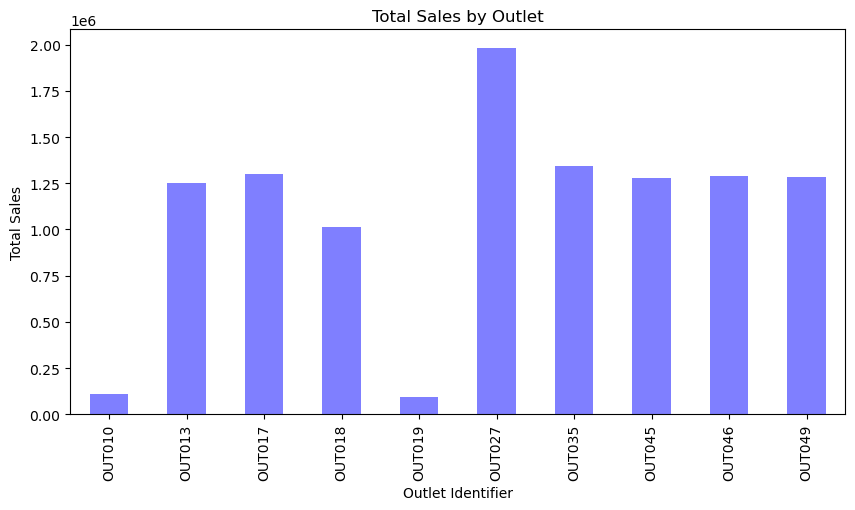

In [357]:
# group df by Outlet_Identifier and calculate the total Item_Outlet_Sales, print the Outlet_Size next to it

df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot(kind='bar', figsize=(10,5), color='blue', alpha=0.5)
plt.title('Total Sales by Outlet')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Identifier')
plt.show()

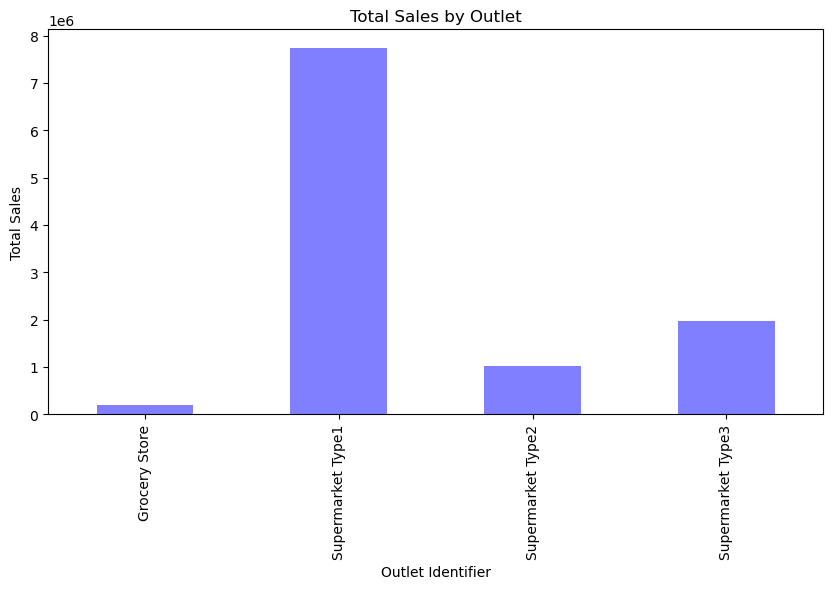

In [365]:
# group df by Outlet_Identifier and calculate the total Item_Outlet_Sales, print the Outlet_Size next to it

df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind='bar', figsize=(10,5), color='blue', alpha=0.5)
plt.title('Total Sales by Outlet')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Identifier')
plt.show()

In [369]:
df[df['Outlet_Identifier'].str.contains('OUT010')].Outlet_Size.unique()

array([nan], dtype=object)

In [368]:
df[df['Outlet_Type'].str.contains('Grocery Store')].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [370]:
df_comb2 = df[df['Outlet_Identifier'].str.contains('OUT010')]
df_comb2.Outlet_Size.fillna('Small', inplace=True)
df.loc[df['Outlet_Identifier'].str.contains('OUT010'), 'Outlet_Size'] = df_comb2.Outlet_Size

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_97174/3356496212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb2.Outlet_Size.fillna('Small', inplace=True)


In [372]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [373]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [374]:
df = df.drop(['Item_Identifier'], axis=1)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [375]:
# creating dummy variables for categorical variables
df_encoded = pd.get_dummies(df)

df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [376]:
df_encoded.shape

(5000, 43)

In [377]:
scaler = MinMaxScaler()
df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']] = scaler.fit_transform(df_encoded[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']])
df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.583333,0.324387,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,1.000000,0.035939,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,0.583333,0.180863,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.541667,0.061260,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,0.083333,0.084247,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [380]:
X = df_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = df_encoded[['Item_Outlet_Sales']]

X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.583333,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.058705,0.072068,1.000000,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.051037,0.468288,0.583333,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.541667,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.000000,0.095805,0.083333,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [392]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.001)  # Adjust alpha as needed
lasso.fit(X, y)

# Use SelectFromModel to get selected features
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)
X_selected.shape

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(5000, 8)

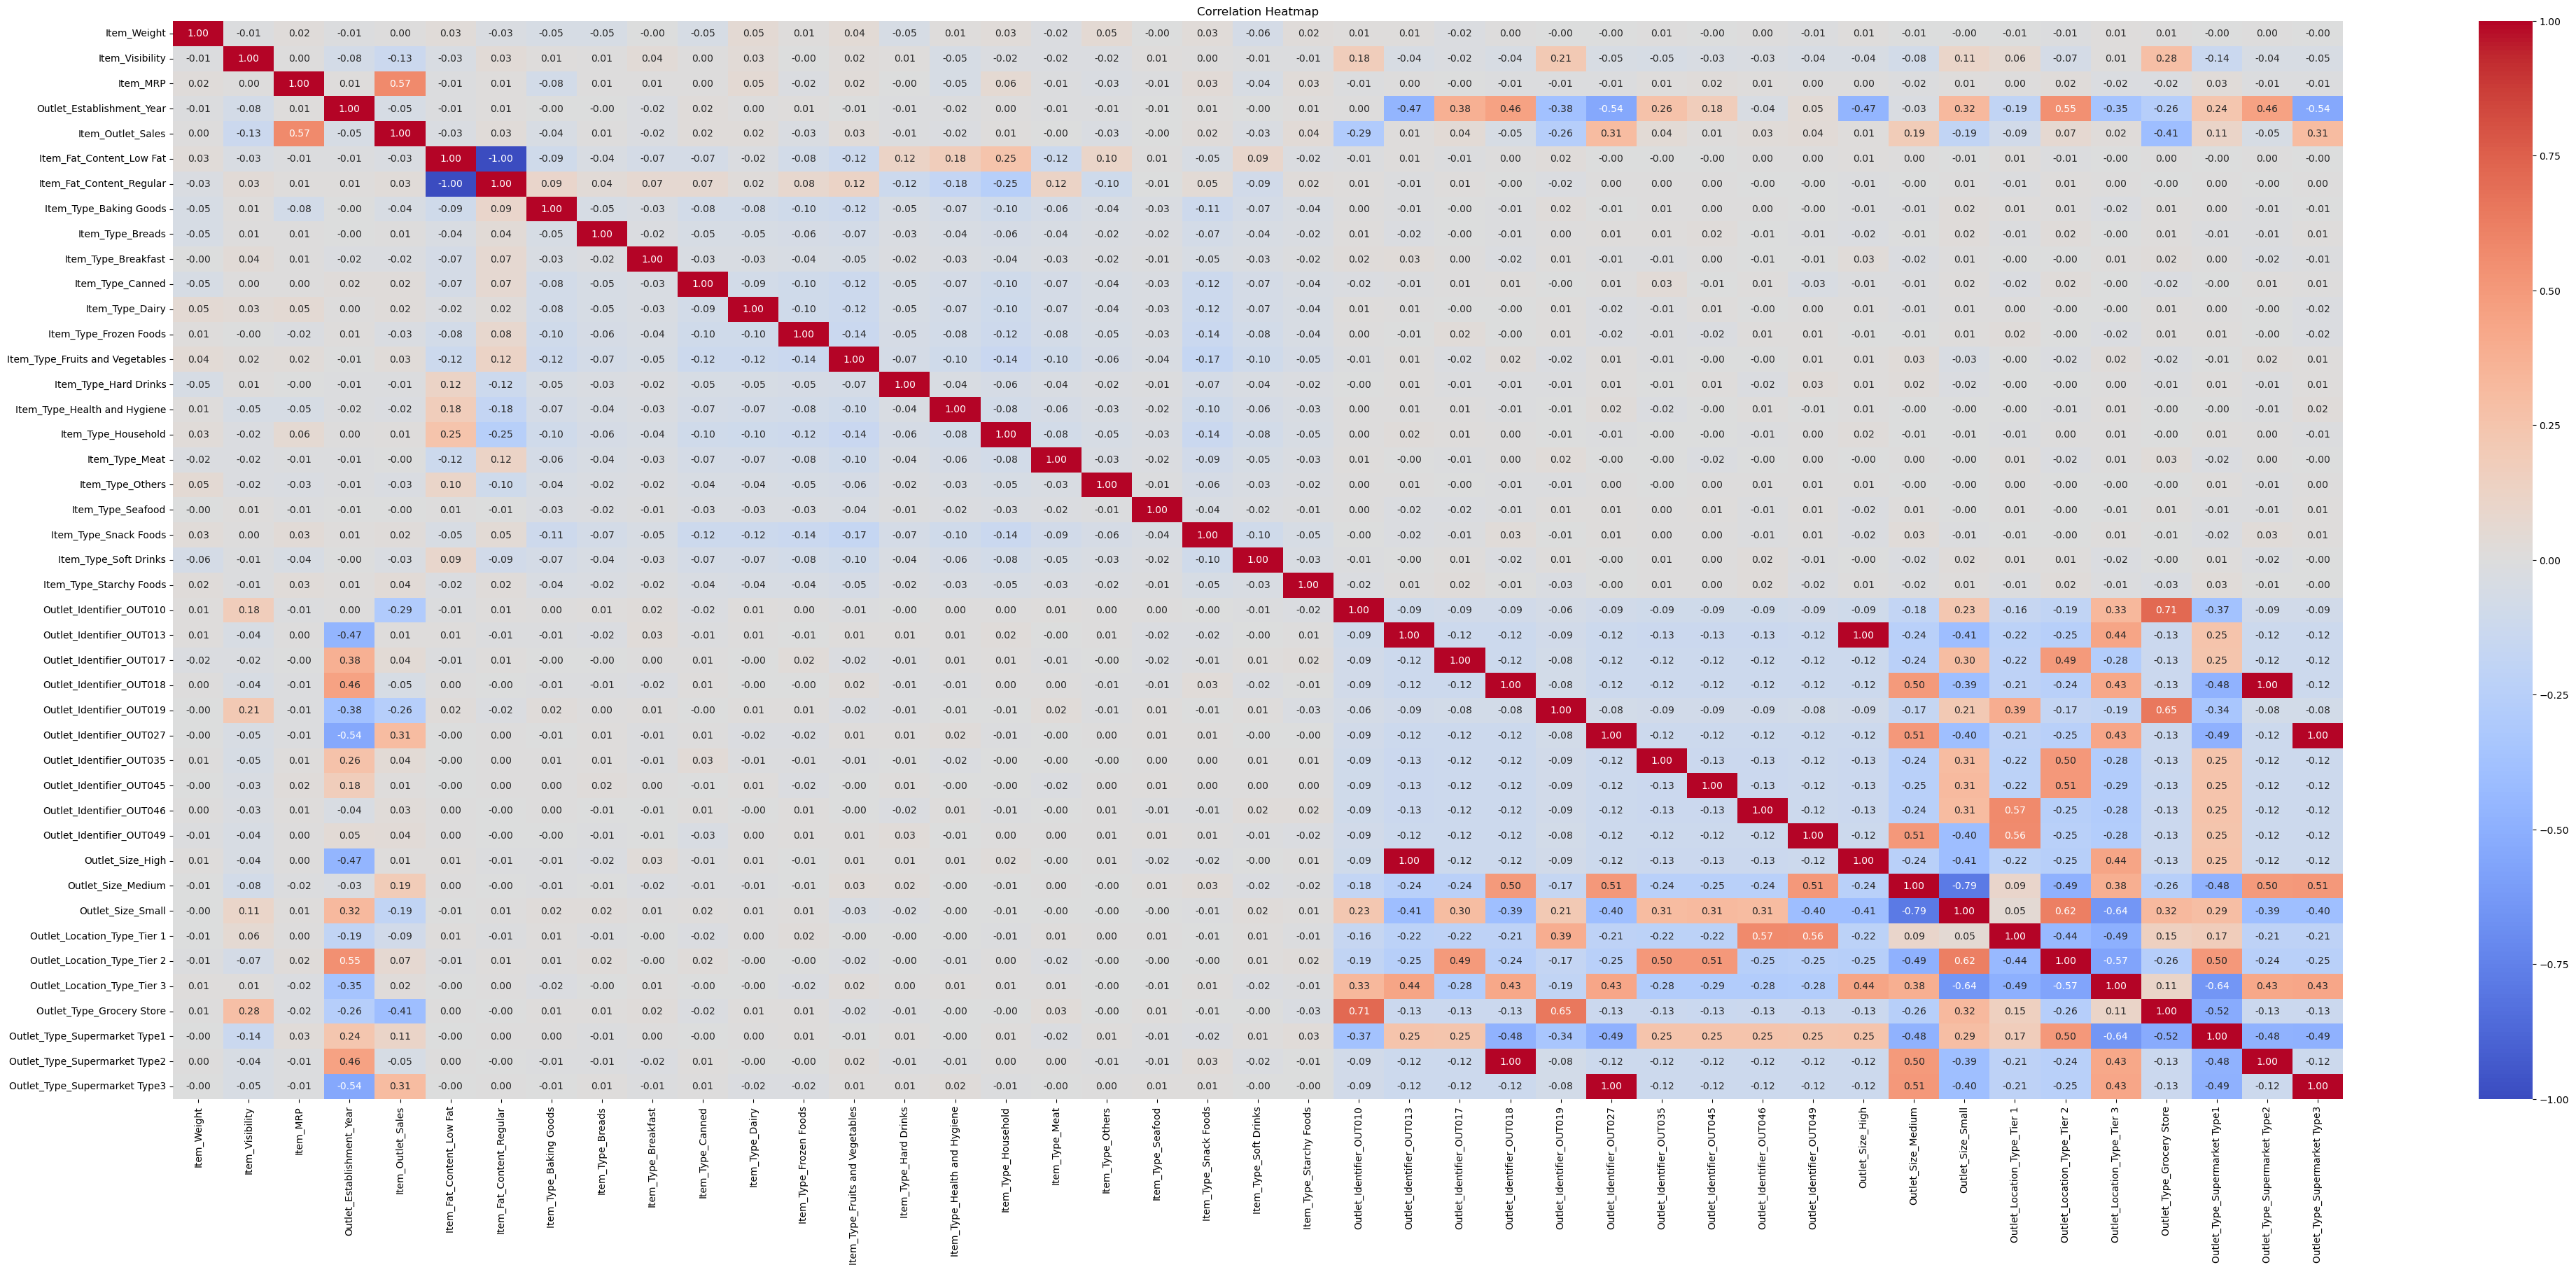

In [381]:
# # Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [393]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 8), (4000, 1)), ((1000, 8), (1000, 1)))

In [394]:
import os
import time

def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(Dense(units=numNeurons, input_dim=inputNeurons, activation='relu'))
    for i in range(numHiddLayers):
        model.add(Dense(units=numNeurons/2, activation='relu'))
    model.add(Dense(units=outputNeurons))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime]],
                            columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'epochs', 'r2Score', 'mse', 'loss', 'batchSize', 'runTime'])

    # save the log entry to CSV with header, and append new entries without rewriting the file, with only one header
    if not os.path.isfile('prob4_new_log.csv'):
        logEntry.to_csv('prob4_new_log.csv', index=False, header=True, mode='a')
    else:
        # Append without writing the header
        logEntry.to_csv('prob4_new_log.csv', index=False, header=False, mode='a')

    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    with tf.device('/GPU:0'):
        y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    start_time = time.time()
    
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    
    end_time = time.time()
    run_time = end_time - start_time
    
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, run_time)



Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 2/1000
1/1 [==============================] - 0s 215ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 3/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 4/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 5/1000
1/1 [==============================] - 0s 212ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 6/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 7/1000
1/1 [==============================] - 0s 278ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 8/1000
1/1 [==============================] - 0s 248ms/step - loss: 0.020

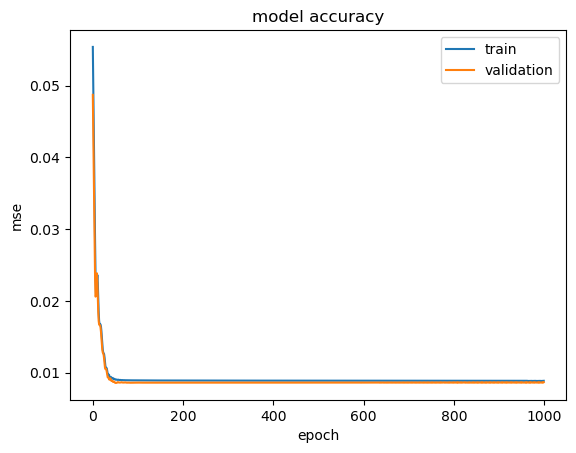

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,epochs,r2Score,mse,loss,batchSize,runTime
0,8,1,8,1024,0.0001,1000,0.61002,0.008645,0.008645,4096,233.577319


In [408]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=4, numNeurons=1024, learningRate=0.0001, epochs=1000, batchSize=4096)